In [1]:
%pylab inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
from scipy.stats.mstats import mode
from scipy import stats

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('Historic_Secured_Property_Tax_Rolls.csv',names=['year','location','neighborhood','neighborhood_code',\
'block_lot','volume','prop_class','class_def','year_built',\
'n_bathrooms','n_bedrooms','n_rooms','n_stories',\
'n_units','charact_change_date','zoning_code',\
'const_type','lot_depth','lot_frontage','prop_area','basement_area','lot_area',\
'lot_code','prior_sales_date','recordation_date',\
'document_no','document_no_2','tax_rate_code',\
'percent_ownership','exemption_code',\
'exemption_code_def','status_code',\
'misc_exemption_value','owner_exemption_value',\
'current_sales_date','fixture_value',\
'improvement_value','land_value',\
'personal_prop_value','zip_code',\
'supervisor_district','neigh_analysis_boundaries',\
'location_1'],low_memory=False)

#df = pd.read_csv('Historic_Secured_Property_Tax_Rolls.csv',low_memory=False)

In [3]:
df

,year,location,neighborhood,neighborhood_code,block_lot,volume,prop_class,class_def,year_built,n_bathrooms,...,owner_exemption_value,current_sales_date,fixture_value,improvement_value,land_value,personal_prop_value,zip_code,supervisor_district,neigh_analysis_boundaries,location_1
0,Closed Roll Fiscal Year,Property Location,Neighborhood Code,Neighborhood Code Definition,Block and Lot Number,Volume Number,Property Class Code,Property Class Code Definition,Year Property Built,Number of Bathrooms,...,Closed Roll Homeowner Exemption Value,Current Sales Date,Closed Roll Assessed Fixtures Value,Closed Roll Assessed Improvement Value,Closed Roll Assessed Land Value,Closed Roll Assessed Personal Prop Value,Zipcode of Parcel,Supervisor District,Neighborhoods - Analysis Boundaries,Location
1,2008,0000 2530 BROADWAY 0000,07B,Pacific Heights,0561035,5,Z,Condominium,1905,1.0,...,7000,11/10/1987,0,728627,255013,0,94123,2,Pacific Heights,"(37.7940340294332, -122.43876013275)"
2,2008,1114 1108 CHURCH ST0000,05C,Noe Valley,3651002,24,A,Apartment,1908,4.0,...,0,NaN,0,65944,45891,0,94114,8,Noe Valley,"(37.7530509295886, -122.427855211117)"
3,2009,0000 0000 0000,08G,Telegraph Hill,0087028,1,V,Vacant Lot,NaN,0.0,...,0,NaN,0,0,0,0,NaN,NaN,NaN,NaN
4,2007,0000 2625 24TH ST0000,09C,Inner ission,4264026,28,V,Vacant Lot,NaN,0.0,...,0,11/04/1940,0,0,875496,0,NaN,NaN,NaN,NaN
5,2013,0000 0000 BERRY ST0000,08H,North Waterfront,9900336,44,Y,Port Commission Property,NaN,0.0,...,0,NaN,0,0,0,0,NaN,NaN,NaN,NaN
6,2008,0000 3636 WEBSTER ST0000,07A,Marina,0445A045,4,Z,Condominium,1931,2.0,...,0,05/02/1950,0,875496,875496,0,94123,2,Marina,"(37.8043959842907, -122.434988882672)"
7,2012,0000 1453 07TH AV0000,02F,Inner Sunset,1846013,14,A,Apartment,1924,4.0,...,0,02/15/1991,0,534393,590915,150,94122,5,Inner Sunset,"(37.7612203754206, -122.464298980296)"
8,2013,0000 0046 REBECCA LN0000,10J,Hunters Point,4720109,29,D,Dwelling,1992,2.0,...,0,09/28/2012,0,99000,231000,0,94124,10,Bayview Hunters Point,"(37.7379025057157, -122.382875334316)"
9,2008,0940 0938 MARKET ST0000,08A,Dowtown,0341005,3,O,Office,1908,16.0,...,0,NaN,0,3240804,2294372,0,NaN,NaN,NaN,NaN


In [4]:
df.prop_class.unique()

array(['Property Class Code', 'Z', 'A', 'V', 'Y', 'D', 'O', 'I', 'X', 'F',
       'C', 'LZ', 'TIA', 'P', 'VR', 'TS', 'CZ', 'ZBM', 'CP', 'CO', 'H2',
       'E', 'F2', 'SP', 'MB', 'A5', 'DD', 'TSF', 'TIF', 'TIC', 'DA', 'AC',
       'OA', nan, 'A15', 'FS', 'RDA', 'TH', 'G', 'W', 'DBM', 'PD', 'IW',
       'LZB', 'PL', 'ZEU', 'COS', 'VPU', 'U', 'M', 'FS5', 'THB', 'PZ',
       'VCI', 'OZ', 'XV', 'B', 'F5', 'N2', 'OA5', 'S', 'T', 'DF', 'FA',
       'N1', 'GZ', 'IZ', 'OC', 'H', 'OBM', 'CM', 'CD', 'HC', 'RH', 'UCP',
       'MIX', 'C1', 'OMD', 'OCH', 'H1', 'RH1', 'FS1', 'OCL', 'TSU', 'DD5',
       'TI1', 'USP', 'OAH', 'OBH', 'IX', 'DA5', 'FA5', 'OCM', 'F15', 'GC',
       'UWL', 'BZ', 'VRX', 'OAT', 'IDC', 'EC', 'DA1', 'OA1'], dtype=object)

In [5]:
items_counts = df['prop_class'].value_counts()

In [6]:
np.set_printoptions(precision=10)
max_item = items_counts.max()
print "The fraction of assesments of properties of the most common class (dwelling) is: ", float(max_item)/(len(df['prop_class'])-1)

The fraction of assesments of properties of the most common class (dwelling) is:  0.470725322714


In [7]:
print df.block_lot.unique()

['Block and Lot Number' '0561035' '3651002' ..., '0847046' '0619141'
 '0775049']


In [8]:
result = df.sort(['block_lot', 'year'], ascending=[1, 1])
grouped = result.groupby(['block_lot'])
new_table = grouped.last()

/Users/jmartine/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


In [9]:
clean_table = new_table.loc[new_table['improvement_value'] != '0']

In [10]:
impr_values = []
for element in clean_table['improvement_value'][:-1]:
    #print float(element)
    value = float(element)
    impr_values.append(value)

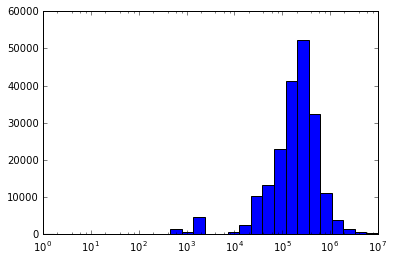

In [11]:
plt.hist(impr_values,bins=np.logspace(0.0, 7.0, 30))
plt.gca().set_xscale("log")

In [12]:
print "The median assessed improvement value is: ", median(impr_values)
print "The mean assessed improvement value is: ", mean(impr_values)

The median assessed improvement value is:  209240.0
The mean assessed improvement value is:  446968.392602


In [13]:
clean_table.neighborhood.unique()

array(['08H', '08E', '08G', '08D', '08C', '08B', '08A', '08I', '08F',
       '07A', '07D', '07B', '06C', '06D', '06E', '06B', '06A', '07C',
       '01C', '01G', '06F', '05B', '05F', '05E', '05H', '01F', '01D',
       '01E', '01A', '01B', '02C', '02E', '02F', '02A', '02B', '02D',
       '02G', '04C', '04T', '03C', '05J', '05G', '04D', '05K', '05D',
       '04F', '05C', '04J', '04H', '04K', '04G', '04P', '04S', '04M',
       '04R', '04N', '10H', '04A', '05M', '09F', '09C', '09B', '09H',
       '09D', '09E', '10A', '10J', '10K', '10E', '10G', '10F', '09A',
       '09G', '10C', '10B', '05A', '04B', '04E', '03H', '10D', '03B',
       '03J', '03G', '03F', '03A', '03E', '03D', nan, 'Neighborhood Code'], dtype=object)

In [14]:
averages = []
for neighbor in clean_table.neighborhood.unique()[:-2]:
    table_neighbor = clean_table.loc[clean_table['neighborhood'] == neighbor]
    #print neighbor, mean(np.array(table_neighbor['improvement_value'].values).astype(np.float))
    averages.append(mean(np.array(table_neighbor['improvement_value'].values).astype(np.float)))
    
print "The difference between the greatest and least average values is: ", max(averages)-min(averages)

The difference between the greatest and least average values is:  5085780.38303


In [15]:
table_for_growth = df.loc[df['land_value'] != '0']

In [16]:
land_values = np.array(table_for_growth['land_value'][1:].values).astype(float)
years = np.array(table_for_growth['year'][1:].values).astype(int)

log_values = log(land_values)
mask = ~np.isnan(log_values)

#print len(years),len(log_values),len(mask)
#print len(years)

slope, intercept, r_value, p_value, slope_std_error = stats.linregress(years[mask], log_values[mask])

In [17]:
print slope,intercept
print "The value of r is:", slope 

0.0418802559163 -72.3804441099
The value of r is: 0.0418802559163


In [18]:
# Area of largest neighborhood
areas = []
for i,neighbor in enumerate(clean_table.neighborhood.unique()[:-2]):
    table_neighbor = clean_table.loc[clean_table['neighborhood'] == neighbor]
    coordinates = table_neighbor['location_1'][~table_neighbor['location_1'].isnull()]
    coordinates = coordinates.map(lambda x: x.lstrip('(').rstrip(')'))
    coordinates = coordinates.str.split(', ')
    coordinates = coordinates.convert_objects(convert_numeric=True)
    coords_x = []
    coords_y = []
    for element in coordinates:
        coords_x.append(float(element[0]))
        coords_y.append(float(element[1]))
    areas.append(np.pi*std(np.array(coords_x))*std(np.array(coords_y)))
        
print "The area of the largest neighborhood is: ", max(areas)

The area of the largest neighborhood is:  0.000305723745093


/Users/jmartine/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [19]:
# Average number of units

table_for_units = df.loc[df['n_units'] != '0']  # Get rid of properties with 0 units
table_for_units1 = table_for_units.loc[~table_for_units['n_units'].isnull()] # eliminate nan
table_for_units2 = table_for_units1.loc[(table_for_units1['year_built'].convert_objects(convert_numeric=True) < 2015) \
& (table_for_units1['year_built'].convert_objects(convert_numeric=True) > 1700)] # eliminate odd years


result = table_for_units2.sort(['block_lot', 'year'], ascending=[1, 1]) # Get only first assessment
grouped = result.groupby(['block_lot'])
new_table = grouped.first()

before_1950 = new_table.loc[new_table['year_built'].convert_objects(convert_numeric=True) < 1950]
on_or_after_1950 = new_table.loc[new_table['year_built'].convert_objects(convert_numeric=True) >= 1950]

/Users/jmartine/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/Users/jmartine/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/Users/jmartine/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:12: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
/Users/jmartine/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


In [20]:
print "The difference in average number of units before and after 1950 is: "\
,mean(on_or_after_1950['n_units'].values.astype(int))-mean(before_1950['n_units'].values.astype(int))


The difference in average number of units before and after 1950 is:  0.538992921452


In [21]:
# Bedrooms per unit in each zipcode
new_table1 = new_table.loc[new_table['n_bedrooms'] != '0'] # More than 0 bedrooms only
new_table2= new_table1.loc[~new_table1['zip_code'].isnull()] # eliminate nan zipcodes


In [22]:
new_table2.zip_code.unique()

array(['94109', '94133', '94111', '94108', '94102', '94123', '94115',
       '94117', '94118', '94121', '94122', '94116', '94127', '94132',
       '94114', '94131', '94112', '94103', '94110', '94105', '94107',
       '94124', '94134', '94158'], dtype=object)

In [37]:
means_bed_per_unit = []
for zipcode in new_table2.zip_code.unique():
    table_zipcode = new_table2.loc[new_table2['zip_code'] == zipcode]
    means_bed_per_unit.append(mean(table_zipcode['n_bedrooms'].values.astype(int))/mean(table_zipcode['n_units'].values.astype(int)))
    #print zipcode,mean(table_zipcode['n_bedrooms'].values.astype(int))/mean(table_zipcode['n_units'].values.astype(int))

In [38]:
print "The maximum ratio of bedrooms per unit (in zipcode 94116) is: ",max(means_bed_per_unit)

The maximum ratio of bedrooms per unit (in zipcode 94116) is:  3.93029871977


In [39]:
# Built area

# Use only last assessment
result = df.sort(['block_lot', 'year'], ascending=[1, 1])
grouped = result.groupby(['block_lot'])
new_table = grouped.last()

/Users/jmartine/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [70]:
new_table1 = new_table.loc[(new_table['prop_area'] != '0') & (new_table['lot_area'] != '0')] # get rid of 0's
new_table2= new_table1.loc[(~new_table1['prop_area'].isnull()) & (~new_table1['lot_area'].isnull()) & (~new_table1['zip_code'].isnull())]

In [77]:
print new_table2['prop_area'].values,new_table2['lot_area'].values

['133675' '198525' '24627' ..., '319279' '310000'
 'Property Area in Square Feet'] ['66124' '57750' '18906.25' ..., '80609' '80630' 'Lot Area']


In [71]:
print new_table2.zip_code.unique()

['94109' '94133' '94111' '94108' '94104' '94102' '94123' '94115' '94117'
 '94118' '94122' '94121' '94129' '94131' '94116' '94127' '94132' '94114'
 '94112' '94103' '94110' '94105' '94107' '94158' '94124' '94134'
 'Zipcode of Parcel']


In [73]:
built_areas = []
for zipcode in new_table2.zip_code.unique()[:-1]:
    table_zipcode = new_table2.loc[new_table2['zip_code'] == zipcode]
    built_areas.append(sum(table_zipcode['prop_area'].values.astype(float))/sum(table_zipcode['lot_area'].values.astype(float)))
    #print sum(table_zipcode['prop_area'].values.astype(float))/sum(table_zipcode['lot_area'].values.astype(float))

In [74]:
print "The largest ratio of property area to surface area of all zip codes is: ",max(built_areas)

The largest ratio of property area to surface area of all zip codes is:  13.5872646159


In [2]:
180*100./3600.

5.0